In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import itertools
from trapezoid import *
from functions import *
from constants import *
from submodels import *

In [3]:
df_train = pd.read_csv("split/train.csv")
df_dev = pd.read_csv("split/dev.csv")

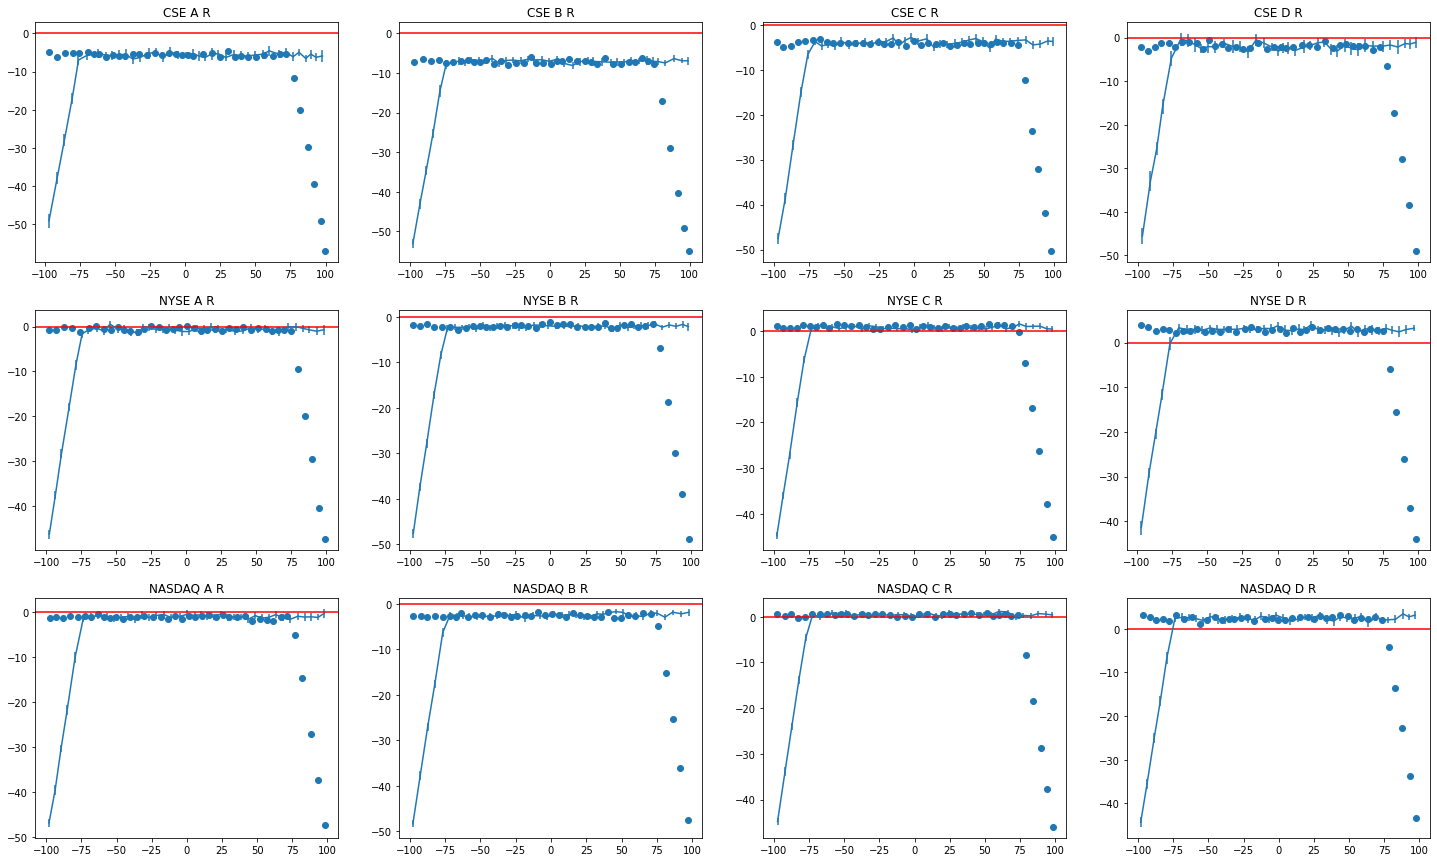

In [4]:
fig, axs = plt.subplots(3, 4)

trapezoid_df = pd.DataFrame([], columns=['xchg', 'stk', 'dir'] + ["x1", "x2", "yl", "ymid", "yr"])

for i, j in itertools.product(range(len(exchanges)), range(len(stocks))):
    xchg = exchanges[i]
    stk = stocks[j]
    # part = parties[k]
    part = 'R'

    df = df_train[(df_train.xchg == xchg) & (df_train.stk == stk) & (df_train.cp == part)]
    df_buy = df[df.dir == "B"]
    df_sell = df[df.dir == "S"]

    buy_xs, buy_ys, buy_yerrs = bin_helper(df_buy.sm, df_buy.real_edge - df_buy.pred_edge, 40)
    axs[i][j].errorbar(buy_xs, buy_ys, buy_yerrs)
    buy_trap = learn_trapezoid(buy_xs, buy_ys, buy_yerrs)

    sell_xs, sell_ys, sell_yerrs = bin_helper(df_sell.sm, df_sell.real_edge - df_sell.pred_edge, 40)
    axs[i][j].errorbar(sell_xs, sell_ys, sell_yerrs)
    sell_trap = learn_trapezoid(sell_xs, sell_ys, sell_yerrs)

    # ls = np.linspace(-100, 100, 100)
    # axs[i][j].plot(ls, [buy_trap.calc(x) for x in ls], c='r', linewidth=5)
    # axs[i][j].plot(ls, [sell_trap.calc(x) for x in ls], c='r', linewidth=5)
    axs[i][j].set_title(f"{xchg} {stk} {part}")
    axs[i][j].axhline(0, c='r')

    trapezoid_df.loc[2 * (i * len(stocks) + j)] = {
        "xchg": xchg,
        "stk": stk,
        "dir": "B",
        "x1": buy_trap.x1,
        "x2": buy_trap.x2,
        "yl": buy_trap.yl,
        "ymid": buy_trap.ymid,
        "yr": buy_trap.yr,
    }

    trapezoid_df.loc[2 * (i * len(stocks) + j) + 1] = {
        "xchg": xchg,
        "stk": stk,
        "dir": "S",
        "x1": sell_trap.x1,
        "x2": sell_trap.x2,
        "yl": sell_trap.yl,
        "ymid": sell_trap.ymid,
        "yr": sell_trap.yr,
    }

trapezoid_df.to_csv("trapezoids.csv")

fig.set_size_inches(25, 15)

/home/kobortor/.local/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/kobortor/.local/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


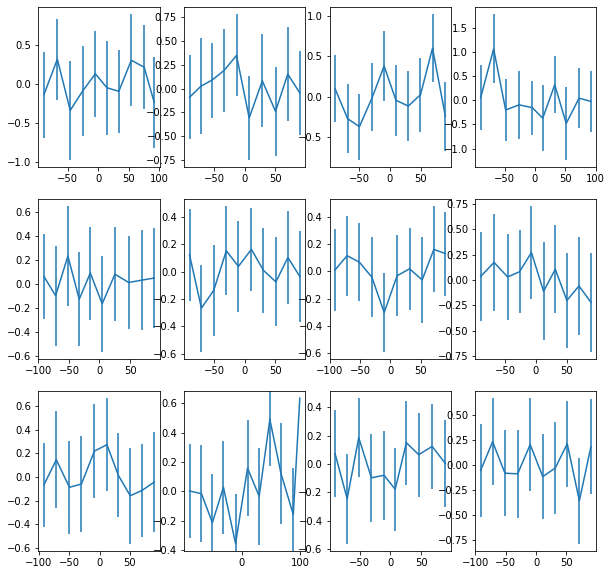

In [17]:
fig, axs = plt.subplots(3, 4)

for i, j in itertools.product(range(len(exchanges)), range(len(stocks))):
    xchg = exchanges[i]
    stk = stocks[j]
    # part = parties[k]
    part = 'R'

    for drct in directions:
        df = df_train[(df_train.xchg == xchg) & (df_train.stk == stk) & (df_train.cp == part) & (df_train.dir == drct)]
        trap = trapezoids[(xchg, stk, drct)]

        slope = retail_lines['slope'][(xchg, stk, drct)]
        offset = retail_lines['slope'][(xchg, stk, drct)]

        ys = df.real_edge - df.pred_edge - np.array([trap.calc(x) for x in df.sm.values]) - df.sz * slope - offset
        # axs[i][j].scatter(df_buy.sz, buy_ys)
    
fig.set_size_inches(10, 10)